In [1]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [4]:
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [5]:

result = []

counter = 0

for target in target_terms:
    
    oldest_tweet = None
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1
    for x in range(1, 6):
          
        public_tweets = api.user_timeline(target, page=x)
    
        
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago =  counter                      

            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            tweet_id = tweet["id"]
            oldest_tweet = tweet_id - 1
            counter += 1

            result.append({"User Name": target,
                           "Tweet": tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": counter})
           
        print(result)

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

[{'User Name': '@BBC', 'Tweet': '🍣🎣 How did we become hooked on sushi? https://t.co/M6UXeJq9DI', 'Date': 'Wed Aug 01 08:01:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 2}, {'User Name': '@BBC', 'Tweet': 'How the handmaid became an international protest symbol. ✊ https://t.co/OswAXEhUgi https://t.co/OU0ae6ApXk', 'Date': 'Wed Aug 01 07:31:04 +0000 2018', 'Compound': -0.25, 'Positive': 0.0, 'Neutral': 0.846, 'Negative': 0.154, 'Tweets Ago': 3}, {'User Name': '@BBC', 'Tweet': 'A French student has spoken out after she was harassed by a man in a Paris street and then hit in the face when she… https://t.co/65bcKXM3P1', 'Date': 'Wed Aug 01 07:27:04 +0000 2018', 'Compound': -0.5423, 'Positive': 0.0, 'Neutral': 0.863, 'Negative': 0.137, 'Tweets Ago': 4}, {'User Name': '@BBC', 'Tweet': '"Y\'alright love?" 😂 This crow has a Yorkshire accent and it\'s the best thing you\'ll hear today. \n\n#YorkshireDay\n\nhttps://t.co/3J8BQGiZM7', 'Date': 'Wed A

In [6]:
tweetresult = pd.DataFrame.from_dict(result)
tweetresult.head()

organized = tweetresult[["User Name","Tweets Ago","Compound","Negative", "Neutral", "Positive", "Tweet", "Date"]]

organized.to_csv("VADER Result for Scatter Plot.CSV", index=False)

organized.head()


,User Name,Tweets Ago,Compound,Negative,Neutral,Positive,Tweet,Date
0,@BBC,2,0.0000,0.000,1.000,0.000,🍣🎣 How did we become hooked on sushi? https://...,Wed Aug 01 08:01:06 +0000 2018
1,@BBC,3,-0.2500,0.154,0.846,0.000,How the handmaid became an international prote...,Wed Aug 01 07:31:04 +0000 2018
2,@BBC,4,-0.5423,0.137,0.863,0.000,A French student has spoken out after she was ...,Wed Aug 01 07:27:04 +0000 2018
3,@BBC,5,0.7964,0.066,0.657,0.277,"""Y'alright love?"" 😂 This crow has a Yorkshire ...",Wed Aug 01 07:02:06 +0000 2018
4,@BBC,6,0.0000,0.000,1.000,0.000,The story of a young girl's choice between Oxf...,Tue Jul 31 20:02:08 +0000 2018


In [7]:
bbc_df = organized.loc[organized["User Name"]=="@BBC", :].reset_index(drop=True)
cbs_df = organized.loc[organized["User Name"]=="@CBS", :].reset_index(drop=True) 
cnn_df = organized.loc[organized["User Name"]=="@CNN", :].reset_index(drop=True)
fox_df = organized.loc[organized["User Name"]=="@FoxNews", :].reset_index(drop=True) 
nyt_df = organized.loc[organized["User Name"]=="@nytimes", :].reset_index(drop=True)


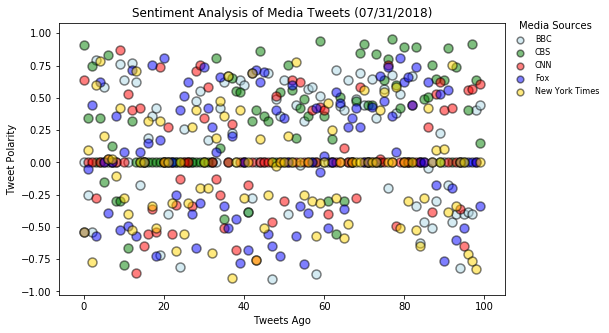

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(np.arange(len(bbc_df["Compound"])),bbc_df["Compound"], s=80, c = "lightblue", edgecolors="black", alpha = 0.50, linewidth = 1.5)
plt.scatter(np.arange(len(cbs_df["Compound"])),cbs_df["Compound"], s=80, c = "green", edgecolors="black", alpha = 0.50, linewidth = 1.5)
plt.scatter(np.arange(len(cnn_df["Compound"])),cnn_df["Compound"], s=80, c = "red", edgecolors="black", alpha = 0.50, linewidth = 1.5)            
plt.scatter(np.arange(len(fox_df["Compound"])),fox_df["Compound"], s=80, c = "blue", edgecolors="black", alpha = 0.50, linewidth = 1.5)
plt.scatter(np.arange(len(nyt_df["Compound"])),nyt_df["Compound"], s=80, c = "gold", edgecolors="black", alpha = 0.50, linewidth = 1.5)            
            

plt.title("Sentiment Analysis of Media Tweets (07/31/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(("BBC", "CBS", "CNN", "Fox", "New York Times"),loc='upper left',bbox_to_anchor=(1.0, 1.035),ncol=1,
           fontsize=8, markerscale=0.75,title='Media Sources',edgecolor='none',framealpha=0.05)
plt.grid

plt.savefig("Sentiment Analysis of Media Tweets.png")
plt.show()

In [9]:
bbc_ave = bbc_df["Compound"].mean()
cbs_ave = cbs_df["Compound"].mean()
cnn_ave = cnn_df["Compound"].mean()
fox_ave = fox_df["Compound"].mean()
nyt_ave = nyt_df["Compound"].mean()

result_ave = {"BBC": bbc_ave, 
              "CBS": cbs_ave, 
              "CNN": cnn_ave, 
              "FoxNews": fox_ave, 
              "New York Times": nyt_ave}

#pd.options.display.float_format = '{:,.2f}'.format
sen = pd.DataFrame(result_ave, index=[0])
sen


,BBC,CBS,CNN,FoxNews,New York Times
0,0.118335,0.255927,0.050744,0.068601,-0.049168


In [10]:
#ax = plt.bar(x_axis, sentiment, color=colors, alpha=0.50, align="edge")
#ax.ticklabel_format(useOffset=False)

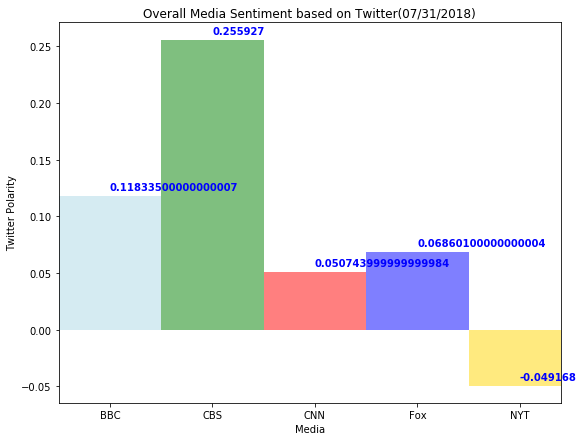

In [51]:
media = ["BBC", "CBS", "CNN", "Fox", "NYT"]
sentiment = [bbc_ave, cbs_ave, cnn_ave, fox_ave, nyt_ave]
x_axis = np.arange(len(sentiment))

colors = ["lightblue", "green", "red", "blue", "gold"]

plt.figure(figsize=(9,7))
plt.bar(x_axis, sentiment, width=1, color=colors, alpha=0.50, align="center")
# useOffset=False 
#for a, b in enumerate(sentiment):

for a,b in zip(x_axis, sentiment):
      plt.text(a, b + 0.005, str(b), color='blue', fontweight='bold')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])

plt.xlim(-0.50, len(x_axis)-0.60)
#plt.ylim(-0.20, max(sentiment)+0.25)

plt.grid
plt.title("Overall Media Sentiment based on Twitter(07/31/2018)")
plt.xlabel("Media")
plt.ylabel("Twitter Polarity")

plt.savefig("Overall Media Sentiment.png")
plt.show()
